In [2]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.3 MB/s eta 0:00:00


In [9]:
import os
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from pmdarima import auto_arima

warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
def adfuller_test(new_cases):
    result=adfuller(new_cases)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        pass
        #print(label+' : '+str(value) )
    if result[1] <= 0.05:
        return True
        #print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        return False
        #print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [12]:
path = '/content/drive/MyDrive/univariate/'

files = os.listdir(path)

locations = []
ps = []
qs = []
rmses = []
mases = []
maes = []


for file_name in files[:]:
    if os.path.isfile(os.path.join(path, file_name)) and file_name != '.dockerenv':
        location = file_name.split('_')[0]
        df = pd.read_csv(path + file_name)
        df = df.set_index('date')
        df.index = pd.to_datetime(df.index)

        train_size = int(len(df) * 0.8)
        train, test = df[0:train_size], df[train_size:]

        stationary = adfuller_test(df['new_cases'])
        if stationary:
            best_aic=float('inf')
            best_p = 0
            best_q = 0
            for p in range(1,5):
                for q in range(1,5):
                    model=ARIMA(train['new_cases'],order=(p,1,q)).fit()
                    aic = model.aic
                    if aic < best_aic:
                      best_p = p
                      best_q = q
            model=ARIMA(train['new_cases'],order=(best_p,1,best_q))
            model_fit=model.fit()
            forecast = model_fit.forecast(steps=len(test), dynamic=True)
            print('y')
        else:
            print('n')
            train_diff = train['new_cases'] - train['new_cases'].shift(1)

            best_aic = float('inf')
            best_p = 0
            best_q = 0
            for p in range(1, 5):
                for q in range(1, 5):
                    model = ARIMA(train_diff,order=(p, 1, q)).fit()
                    aic = model.aic
                    if aic < best_aic:
                        best_p = p
                        best_q = q

            model = ARIMA(train_diff, order=(best_p, 1, best_q))
            model_fit = model.fit()

            forecast_diff = model_fit.forecast(steps=len(test), dynamic=True)
            forecast = train['new_cases'].iloc[-1] + np.cumsum(forecast_diff)

        forecast = np.maximum(forecast, 0)

        mae = mean_absolute_error(test['new_cases'], forecast)
        rmse = np.sqrt(mean_squared_error(test['new_cases'], forecast))

        naive_forecast = train['new_cases'].iloc[-1]
        naive_mae = mean_absolute_error(test['new_cases'], np.full_like(test['new_cases'], naive_forecast))
        mase = mae / naive_mae

        locations.append(location)
        ps.append(best_p)
        qs.append(best_q)
        rmses.append(rmse)
        mases.append(mase)
        maes.append(mae)
        print(location)

results = pd.DataFrame({
    'location': locations,
    'p': ps,
    'q': qs,
    'rmse': rmses,
    'mase': mases,
    'mae': maes
})


y
India
y
United Kingdom
y
Peru
n
Italy
y
Mexico
y
Argentina
y
Sweden
n
Malaysia
y
Morocco
y
Australia


In [13]:
results

,location,p,q,rmse,mase,mae
0,India,4,4,203463.354387,21.383397,194418.865866
1,United Kingdom,4,4,31907.320528,1.301277,31342.443649
2,Peru,4,4,24259.705909,34.865208,23967.340338
3,Italy,4,4,21149.739488,1.121878,15647.419440
4,Mexico,4,4,38466.750158,2.536688,37517.859399
5,Argentina,4,4,51082.714205,67.407310,50049.927890
6,Sweden,4,4,13654.811498,18.328564,13368.505765
7,Malaysia,4,4,6144.376744,1.234147,4216.667772
8,Morocco,4,4,6122.415218,62.753718,5967.579752
9,Australia,4,4,17102.623470,0.987115,12581.154787


from matplotlib import pyplot as plt
_df_0['rmse'].plot(kind='hist', bins=20, title='rmse')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['mase'].plot(kind='hist', bins=20, title='mase')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['mae'].plot(kind='hist', bins=20, title='mae')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='rmse', y='mase', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='mase', y='mae', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['p']
  ys = series['rmse']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('p', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('p')
_ = plt.ylabel('rmse')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['p']
  ys = series['mase']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('p', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('p')
_ = plt.ylabel('mase')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['p']
  ys = series['mae']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('p', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('p')
_ = plt.ylabel('mae')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['p']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'p'}, axis=1)
              .sort_values('p', ascending=True))
  xs = counted['p']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('p', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('p')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_9['rmse'].plot(kind='line', figsize=(8, 4), title='rmse')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['mase'].plot(kind='line', figsize=(8, 4), title='mase')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['mae'].plot(kind='line', figsize=(8, 4), title='mae')
plt.gca().spines[['top', 'right']].set_visible(False)

In [14]:
results.to_csv('arima_alex_o.csv', index=False)

In [108]:
results

,location,p,q,rmse,mase,mae
0,India,4,4,203463.354387,21.383397,194418.865866
1,United Kingdom,4,4,31907.320528,1.301277,31342.443649
2,Peru,4,4,24259.705909,34.865208,23967.340338
3,Italy,4,4,21149.739488,1.121878,15647.419440
4,Mexico,4,4,38466.750158,2.536688,37517.859399
5,Argentina,4,4,51082.714205,67.407310,50049.927890
6,Sweden,4,4,13654.811498,18.328564,13368.505765
7,Malaysia,4,4,6144.376744,1.234147,4216.667772
8,Morocco,4,4,6122.415218,62.753718,5967.579752
9,Australia,4,4,17102.623470,0.987115,12581.154787


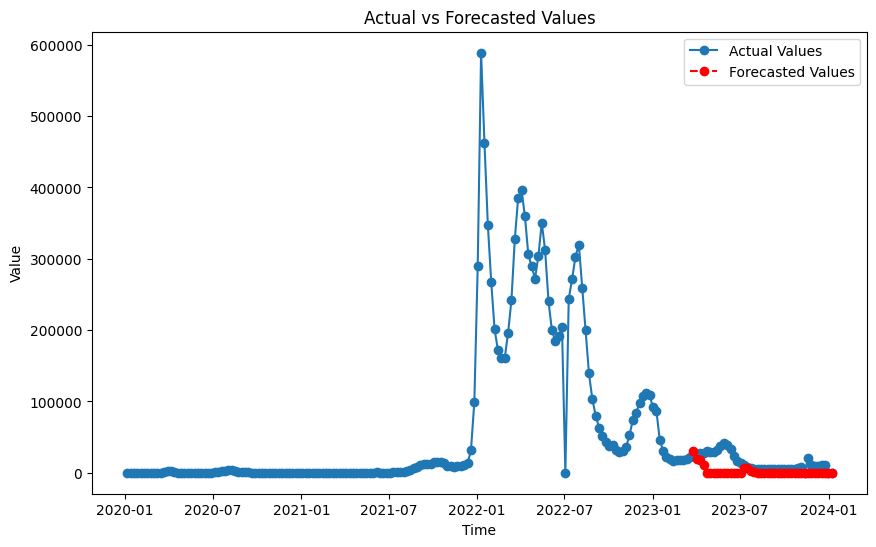

In [15]:
test_dates = df.index
actual_values = df['new_cases'].values
forecast_dates = forecast.index

plt.figure(figsize=(10, 6))
plt.plot(test_dates, actual_values, label='Actual Values', marker='o')
plt.plot(forecast_dates, forecast, label='Forecasted Values', linestyle='dashed', color='red', marker='o')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual vs Forecasted Values')
plt.legend()
plt.show()

In [17]:
path = '/content/drive/MyDrive/univariate/'

files = os.listdir(path)

locations = []
ps = []
qs = []
rmses = []
mases = []
maes = []


for file_name in files[:]:
    if os.path.isfile(os.path.join(path, file_name)) and file_name != '.dockerenv':
        location = file_name.split('_')[0]
        df = pd.read_csv(path + file_name)
        df = df.set_index('date')
        df.index = pd.to_datetime(df.index)

        train_size = int(len(df) * 0.8)
        train, test = df[0:train_size], df[train_size:]

        stationary = adfuller_test(df['new_cases'])
        if stationary:
            auto_model = auto_arima(train['new_cases'], seasonal=True, m=4, suppress_warnings=True, stepwise=False)
            forecast, conf_int = auto_model.predict(n_periods=len(test), return_conf_int=True)
            print('y')
        else:
            print('n')
            train_diff = train['new_cases'] - train['new_cases'].shift(1)

            auto_model = auto_arima(train_diff.dropna(), seasonal=True, m=4, suppress_warnings=True, stepwise=False)

            forecast_diff, conf_int = auto_model.predict(n_periods=len(test), return_conf_int=True)
            forecast = train['new_cases'].iloc[-1] + np.cumsum(forecast_diff)

        forecast = np.maximum(forecast, 0)

        mae = mean_absolute_error(test['new_cases'], forecast)
        rmse = np.sqrt(mean_squared_error(test['new_cases'], forecast))

        naive_forecast = train['new_cases'].iloc[-1]
        naive_mae = mean_absolute_error(test['new_cases'], np.full_like(test['new_cases'], naive_forecast))
        mase = mae / naive_mae

        locations.append(location)
        rmses.append(rmse)
        mases.append(mase)
        maes.append(mae)
        print(location)

results = pd.DataFrame({
    'location': locations,
    'rmse': rmses,
    'mase': mases,
    'mae': maes
})

y
India
y
United Kingdom
y
Peru
n
Italy
y
Mexico
y
Argentina
y
Sweden
n
Malaysia
y
Morocco
y
Australia


In [167]:
results

,location,rmse,mase,mae
0,India,110661.192066,11.409557,103736.233793
1,United Kingdom,22569.370090,0.900310,21684.775815
2,Peru,10045.143860,14.294705,9826.588978
3,Italy,16947.931602,1.012739,14125.197275
4,Mexico,18964.887781,1.229782,18188.592873
5,Argentina,38431.309721,50.619326,37584.849663
6,Sweden,7384.962734,9.837157,7175.034908
7,Malaysia,8810.811001,2.353019,8039.480122
8,Morocco,4795.070937,49.067111,4666.048576
9,Australia,27517.557022,1.872546,23866.312291


In [18]:
results

,location,rmse,mase,mae
0,India,110661.192066,11.409557,103736.233793
1,United Kingdom,22569.370090,0.900310,21684.775815
2,Peru,10045.143860,14.294705,9826.588978
3,Italy,16947.931602,1.012739,14125.197275
4,Mexico,18964.887781,1.229782,18188.592873
5,Argentina,38431.309721,50.619326,37584.849663
6,Sweden,7384.962734,9.837157,7175.034908
7,Malaysia,8810.811001,2.353019,8039.480122
8,Morocco,4795.070937,49.067111,4666.048576
9,Australia,27517.557022,1.872546,23866.312291


from matplotlib import pyplot as plt
results['rmse'].plot(kind='hist', bins=20, title='rmse')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results['mase'].plot(kind='hist', bins=20, title='mase')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results['mae'].plot(kind='hist', bins=20, title='mae')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results.plot(kind='scatter', x='rmse', y='mase', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results.plot(kind='scatter', x='mase', y='mae', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results['rmse'].plot(kind='line', figsize=(8, 4), title='rmse')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
results['mase'].plot(kind='line', figsize=(8, 4), title='mase')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
results['mae'].plot(kind='line', figsize=(8, 4), title='mae')
plt.gca().spines[['top', 'right']].set_visible(False)

In [20]:
results.to_csv('autoarima_alex_o.csv', index=False)